<IPython.core.display.Javascript object>


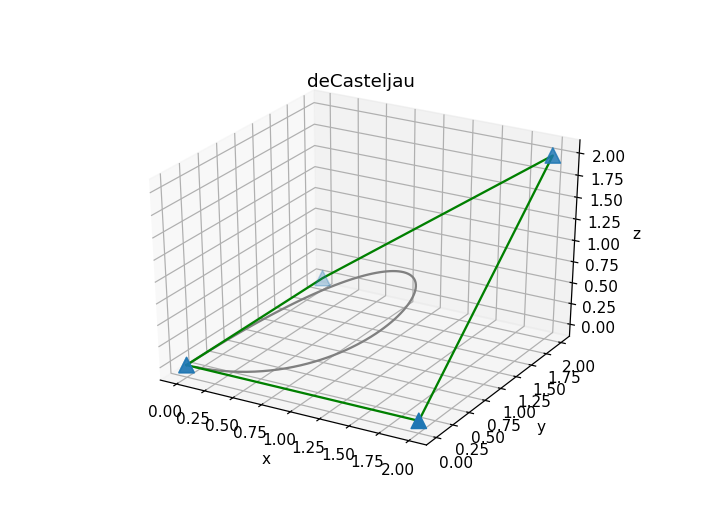

In [3]:
#Chapter 3.2 p.35
#The de Casteljau Algorithm

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z 
        
    def multiply(self, multiplier):
        return Point(self.x * multiplier, self.y * multiplier, self.z * multiplier)
    
    def __add__(self, otherPoint):
        return Point(self.x + otherPoint.x, self.y + otherPoint.y, self.z + otherPoint.z)
    
    def __sub__(self, otherPoint):
        return Point(self.x - otherPoint.x, self.y - otherPoint.y, self.z - otherPoint.z)
        
        
class deCasteljau:
    def __init__(self, points):
        self.points = points
    
    def b(self,r,i,t):
        
        #print("r: ", r)
        #print("i: ", i)
        
        if r == 0:
            return points[i];
        
        return  self.b(r - 1, i, t).multiply(1 - t) +  self.b(r - 1, i + 1, t).multiply(t)
        
   
points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

framex = [0,0,2,2,0]
framey = [0,2,2,0,0]
framez = [0,0,2,0,0]

dc = deCasteljau(points)

xline = list()
yline = list()
zline = list()


for i in np.arange(0.0, 1.0, 0.01):
    p = dc.b(4,0,i)
    
    xline.append(p.x)
    yline.append(p.y)
    zline.append(p.z)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('deCasteljau')

ax.plot3D(xline, yline, zline, 'gray')
ax.plot3D(framex, framey, framez, 'green')

ax.scatter(framex, framey, framez, marker='^',s=100)

plt.show()


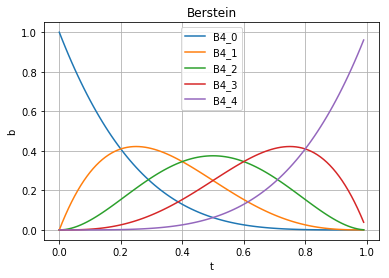

In [4]:
#Chapter 4 p.45
#Berstein Polynomials

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    fact = 1
    for i in range(1,n+1): 
        fact = fact * i 
    return fact

def binomial(n, i):
    if (i >= 0 and i <= n):
        return factorial(n)/(factorial(i) * factorial(n - i))
    else:
        return 0
    
class Berstein:

    def B(self, n, i, t):
        
        if (n == 0 and i == 0):
            return 1
        elif (i > n or i < 0):
            return 0
        
        return (1 - t) * self.B(n - 1, i, t) + t * self.B(n - 1, i - 1, t)
        
b1 = Berstein()

xline = list()
yline = list()

fig, ax = plt.subplots()

for i in np.arange(0,5,1):
    
    xline.clear()
    yline.clear()

    for t in np.arange(0.0, 1.0, 0.01):
        p = b1.B(4,i,t)

        xline.append(t)
        yline.append(p)
  
    ax.plot(xline, yline, label="B4_" + str(i))
    
       

ax.set(xlabel='t', ylabel='b',
       title='Berstein')
ax.grid()
#fig.savefig("test.png")
plt.legend()
plt.show()    



<IPython.core.display.Javascript object>


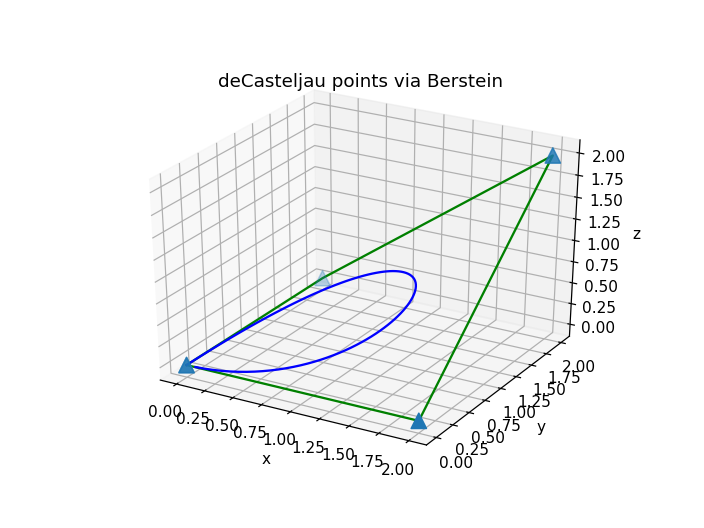

In [5]:
#Chapter 4.1 p.44
#de Casteljau points expressed in terms of Berstein polynomials

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

framex = [0,0,2,2,0]
framey = [0,2,2,0,0]
framez = [0,0,2,0,0]

xline = list()
yline = list()
zline = list()

n = 5
r = 4
i = 0

b = Berstein()

for t in np.arange(0, 1 ,0.01):
    bri = Point(0,0,0)
    for j in range(0,r + 1, 1):
        if i >= 0 and i <= (n - r):
            bri = bri + points[i + j].multiply(b.B(r,j,t))
    
    xline.append(bri.x)
    yline.append(bri.y)
    zline.append(bri.z)
        
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('deCasteljau points via Berstein')


ax.plot3D(framex, framey, framez, 'green') 
ax.plot3D(xline, yline, zline, 'blue')

ax.scatter(framex, framey, framez, marker='^',s=100)

plt.show()



<IPython.core.display.Javascript object>


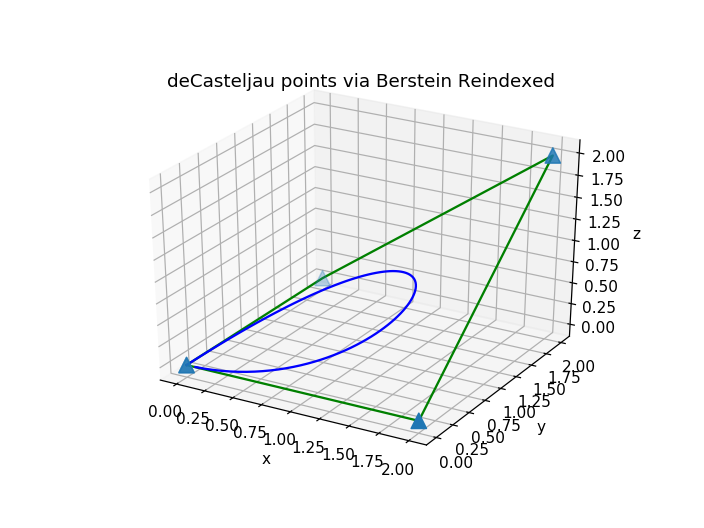

In [6]:
#Chapter 4.1 p.46
#de Casteljau points expressed in terms of Berstein polynomials reindexed

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

framex = [0,0,2,2,0]
framey = [0,2,2,0,0]
framez = [0,0,2,0,0]

xline = list()
yline = list()
zline = list()

n = 5
r = 4
i = 0

b = Berstein()

for t in np.arange(0, 1 ,0.01):
    bri = Point(0,0,0)
    for j in range(i,i + r + 1, 1):
        #if i >= 0 and i <= (n - r):
        bri = bri + points[j].multiply((1-t) * b.B(r - 1,j - i,t) + 
                                       t * b.B(r - 1, j - i - 1,t))
    
    xline.append(bri.x)
    yline.append(bri.y)
    zline.append(bri.z)
        
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('deCasteljau points via Berstein Reindexed')


ax.plot3D(framex, framey, framez, 'green') 
ax.plot3D(xline, yline, zline, 'blue')

ax.scatter(framex, framey, framez, marker='^',s=100)

plt.show()

In [7]:
#Chapter 4.2 p.48
#linear precision

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

n = 5
sum = 0
t = 0.6

b = Berstein()

for j in range(0, n + 1, 1):
    sum = sum + j / n * b.B(n,j,t)
    
print("sum", sum)
print("t", t)
    
if (abs(sum  - t) < 0.05):
    print("linear precision holds")


sum 0.6000000000000001
t 0.6
linear precision holds


<IPython.core.display.Javascript object>


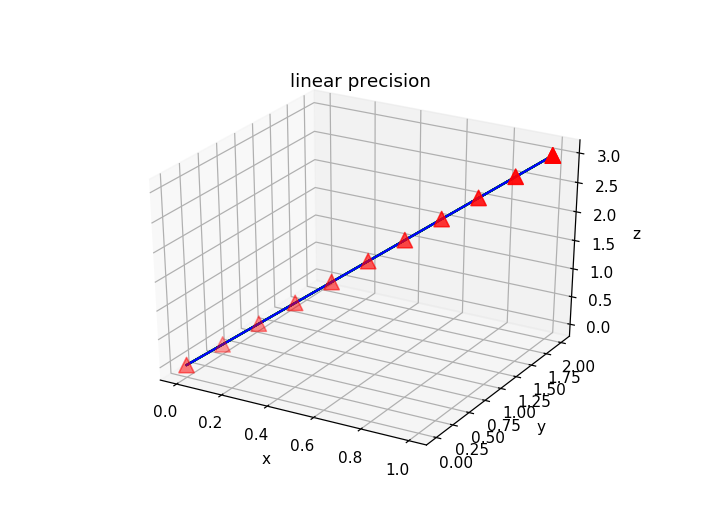

In [8]:
#Chapter 4.2 p.48
#linear precision 2

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

points = [Point(0,0,0), Point(0,2,0)]

p = Point(0,0,0)
q = Point(1,2,3)
n = 10

framex = [0,1]
framey = [0,2]
framez = [0,3]

xline = list()
yline = list()
zline = list()

for j in range(0, n + 1, 1):
    b =  p.multiply((1 - j/n)) + q.multiply(j/n)
    xline.append(b.x)
    yline.append(b.y)
    zline.append(b.z)
    framex.append(b.x)
    framey.append(b.y)
    framez.append(b.z)
    
fig1 = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('linear precision')


ax.plot3D(framex, framey, framez, 'green') 
ax.plot3D(xline, yline, zline, 'blue')

ax.scatter(framex, framey, framez, marker='^',s=100,color='red')

plt.show()



<IPython.core.display.Javascript object>


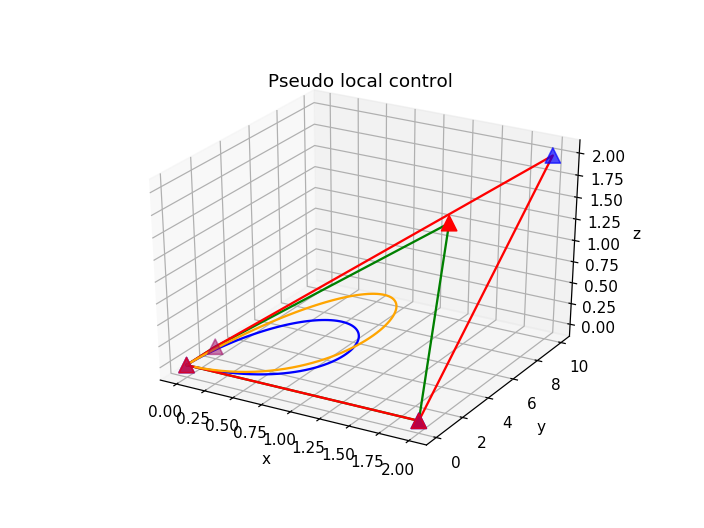

In [9]:
#Chapter 4.2 p.48
#Pseudo-local control

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

points1 = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

framex1 = [0,0,2,2,0]
framey1 = [0,2,2,0,0]
framez1 = [0,0,2,0,0]

xline1 = list()
yline1 = list()
zline1 = list()

points2 = [Point(0,0,0), Point(0,2,0), Point(2,10,2), Point(2,0,0), Point(0,0,0)]

framex2 = [0,0,2,2,0]
framey2 = [0,2,10,0,0]
framez2 = [0,0,2,0,0]

xline2 = list()
yline2 = list()
zline2 = list()

n = 5
r = 4
i = 0

b = Berstein()

for t in np.arange(0, 1 ,0.01):
    bri = Point(0,0,0)
    for j in range(i,i + r + 1, 1):
        #if i >= 0 and i <= (n - r):
        bri = bri + points1[j].multiply((1-t) * b.B(r - 1,j - i,t) + 
                                       t * b.B(r - 1, j - i - 1,t))
    
    xline1.append(bri.x)
    yline1.append(bri.y)
    zline1.append(bri.z)
    
for t in np.arange(0, 1 ,0.01):
    bri = Point(0,0,0)
    for j in range(i,i + r + 1, 1):
        #if i >= 0 and i <= (n - r):
        bri = bri + points2[j].multiply((1-t) * b.B(r - 1,j - i,t) + 
                                       t * b.B(r - 1, j - i - 1,t))
    
    xline2.append(bri.x)
    yline2.append(bri.y)
    zline2.append(bri.z)
        
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Pseudo local control')


ax.plot3D(framex1, framey1, framez1, 'green') 
ax.plot3D(xline1, yline1, zline1, 'blue')
ax.plot3D(framex2, framey2, framez2, 'red') 
ax.plot3D(xline2, yline2, zline2, 'orange')

ax.scatter(framex1, framey1, framez1, marker='^',s=100, color="red")
ax.scatter(framex2, framey2, framez2, marker='^',s=100, color="blue")

plt.show()

In [10]:
#Chapter 4.3 p.48
#derivative of a Berstein polynomial

n = 4
i = 0
b = Berstein()

for t in np.arange(0, 1, 0.1):
    dbdtB = n * (b.B(n - 1, i - 1, t) - b.B(n - 1, i, t))
    print(t, "dbdtB", dbdtB)



0.0 dbdtB -4.0
0.1 dbdtB -2.9160000000000004
0.2 dbdtB -2.0480000000000005
0.30000000000000004 dbdtB -1.3719999999999997
0.4 dbdtB -0.864
0.5 dbdtB -0.5
0.6000000000000001 dbdtB -0.25599999999999984
0.7000000000000001 dbdtB -0.10799999999999992
0.8 dbdtB -0.03199999999999998
0.9 dbdtB -0.0039999999999999975


In [11]:
#Chapter 4.3 p.4*
#derivative of a Bezier curve

points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

def sum(n, t, points):
    p = Point(0,0,0)
    B = Berstein()
    for j in range(0,n - 1,1):
        deltab = points[j + 1] - points[j]
        p = p + deltab.multiply(B.B(n - 1,j,t))
    return p
    
n = 3   
t = 0

for t in np.arange(0,1,0.1):
    dbdt = sum(n,t, points).multiply(n)
    print(dbdt.x, dbdt.y, dbdt.z)


0.0 6.0 0.0
1.08 4.86 1.08
1.9200000000000004 3.8400000000000007 1.9200000000000004
2.5200000000000005 2.9399999999999995 2.5200000000000005
2.88 2.16 2.88
3.0 1.5 3.0
2.88 0.9599999999999995 2.88
2.5199999999999996 0.5399999999999997 2.5199999999999996
1.9199999999999997 0.23999999999999988 1.9199999999999997
1.0799999999999998 0.05999999999999997 1.0799999999999998


In [12]:
#Chapter 4.4 p.50
#higher order derivatives

points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

def forward_diff_op(r, i, pts):
    p = Point(0,0,0)
    for j in range(0, r + 1, 1):
        p = p + pts[j + i].multiply(binomial(r,j) * pow(-1, r - j))
    return p

def high_order_derivative(r, n, t, pts):
    mult = factorial(n) / factorial(n - r)
    p = Point(0,0,0)
    B = Berstein()
    for j in range(0, n - r + 1, 1):
        p = p + forward_diff_op(r, j, pts).multiply(B.B(n - r, j, t))
    p = p.multiply(mult)
    return p

r = 2
n = 3


for t in np.arange(0,1,0.1):
    drdtr = high_order_derivative(r, n, t, points)
    print(t, drdtr.x, drdtr.y, drdtr.z)


        
        

0.0 12.0 -12.0 12.0
0.1 9.600000000000001 -12.0 8.399999999999999
0.2 7.200000000000001 -12.0 4.800000000000001
0.30000000000000004 4.799999999999999 -12.0 1.1999999999999984
0.4 2.3999999999999995 -12.0 -2.400000000000001
0.5 0.0 -12.0 -6.0
0.6000000000000001 -2.400000000000002 -12.0 -9.600000000000003
0.7000000000000001 -4.800000000000002 -12.0 -13.200000000000001
0.8 -7.200000000000001 -12.0 -16.8
0.9 -9.600000000000001 -12.0 -20.400000000000002


<IPython.core.display.Javascript object>


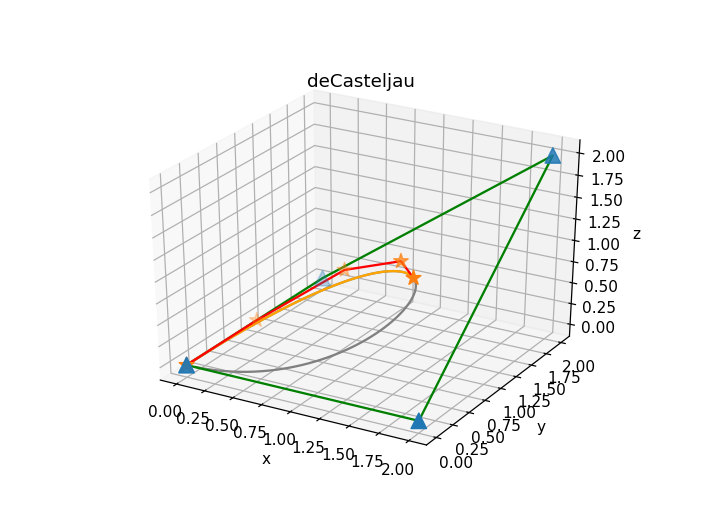

In [17]:
#chapter 4.6 p.53
#Subdivision

points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

framex = [0,0,2,2,0]
framey = [0,2,2,0,0]
framez = [0,0,2,0,0]

dc = deCasteljau(points)

xline = list()
yline = list()
zline = list()

xlinesub = list()
ylinesub = list()
zlinesub = list()

framexsub = list()
frameysub = list()
framezsub = list()

for i in np.arange(0.0, 1.0, 0.01):
    p = dc.b(4,0,i)
    
    xline.append(p.x)
    yline.append(p.y)
    zline.append(p.z)
    
for i in np.arange(0.0, 0.5, 0.01):
    p = dc.b(4,0,i)
    
    xlinesub.append(p.x)
    ylinesub.append(p.y)
    zlinesub.append(p.z)
    
for i in range(0, 4 + 1, 1):
    p = dc.b(i,0,0.5)
    
    framexsub.append(p.x)
    frameysub.append(p.y)
    framezsub.append(p.z)


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Subdivision')

ax.plot3D(xline, yline, zline, 'gray')
ax.plot3D(framex, framey, framez, 'green')
ax.plot3D(xlinesub, ylinesub, zlinesub, 'orange')
ax.plot3D(framexsub, frameysub, framezsub, 'red')

ax.scatter(framex, framey, framez, marker='^',s=100)
ax.scatter(framexsub, frameysub, framezsub, marker='*',s=100)

plt.show()
